In [1]:
import os
import re
import numpy as np

from robosuite.models.objects import MujocoXMLObject
from robosuite.utils.mjcf_utils import xml_path_completion

from libero.libero.envs.base_object import register_object

import pathlib

from libero.libero.envs.base_object import (
    register_visual_change_object,
    register_object,
)
from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates
from libero.libero.utils.task_generation_utils import register_task_info, get_task_info, generate_bddl_from_task_info


[robosuite WARNING] No private macro file found! (__init__.py:7)
[robosuite WARNING] It is recommended to use a private macro file (__init__.py:8)
[robosuite WARNING] To setup, run: python /home/xingyouguang/data/software/miniconda3/envs/openvla-mini/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (__init__.py:9)


### Define your own objects
You may want to include more object meshes of yours in the procedural generation pipeline. One option is to include your assets and define your object directly inside the LIBERO codebase. But this can make the whole thing messy. 

Alternatively, you can define the objects inside your custom project repo folder, and define the object classes accordingly. Note that you need to import your defined object classes whenever you run your own stuff. Libero codebase cannot automatically import those that are defined outside its repo.

In the next, we provide an example, assuming you have object meses defined in `custom_assets`. In this example, we assume the generated pddl file will be saved in `custom_pddl`.

In [2]:
from libero.libero.envs.objects import get_object_dict, get_object_fn
object_dict = get_object_dict()
for x in object_dict.keys():
    if 'mug' in x:
        print(x)

red_coffee_mug
porcelain_mug
white_yellow_mug


In [3]:

class CustomObjects(MujocoXMLObject):
    def __init__(self, custom_path, name, obj_name, joints=[dict(type="free", damping="0.0005")]):
        # make sure custom path is an absolute path
        assert(os.path.isabs(custom_path)), "Custom path must be an absolute path"
        # make sure the custom path is also an xml file
        assert(custom_path.endswith(".xml")), "Custom path must be an xml file"
        super().__init__(
            custom_path,
            name=name,
            joints=joints,
            obj_type="all",
            duplicate_collision_geoms=False,
        )
        self.category_name = "_".join(
            re.sub(r"([A-Z])", r" \1", self.__class__.__name__).split()
        ).lower()
        self.object_properties = {"vis_site_names": {}}

@register_object
class LiberoMug(CustomObjects):
    def __init__(self,
                 name="libero_mug",
                 obj_name="libero_mug",
                 ):
        super().__init__(
            custom_path=os.path.abspath(os.path.join(
                "./", "custom_assets", "libero_mug", "libero_mug.xml"
            )),
            name=name,
            obj_name=obj_name,
        )

        self.rotation = {
            "x": (-np.pi/2, -np.pi/2),
            "y": (-np.pi, -np.pi),
            "z": (np.pi, np.pi),
        }
        self.rotation_axis = None

@register_object
class LiberoMugYellow(CustomObjects):
    def __init__(self,
                 name="libero_mug",
                 obj_name="libero_mug",
                 ):
        super().__init__(
            custom_path=os.path.abspath(os.path.join(
                "./", "custom_assets", "libero_mug_yellow", "libero_mug_yellow.xml"
            )),
            name=name,
            obj_name=obj_name,
        )

        self.rotation = {
            "x": (-np.pi/2, -np.pi/2),
            "y": (-np.pi, -np.pi),
            "z": (np.pi, np.pi),
        }
        self.rotation_axis = None
        
@register_object
class LiberoMugYellowX(CustomObjects):
    def __init__(self,
                 name="libero_mug",
                 obj_name="libero_mug",
                 ):
        super().__init__(
            custom_path=os.path.abspath(os.path.join(
                "./", "custom_assets", "libero_mug_yellow", "libero_mug_yellow.xml"
            )),
            name=name,
            obj_name=obj_name,
        )

        self.rotation = {
            "x": (-np.pi/2, -np.pi/2),
            "y": (-np.pi/2, -np.pi/2),
            "z": (np.pi/2, np.pi/2),
        }
        self.rotation_axis = "x"
        
@register_object
class LiberoMugYellowY(CustomObjects):
    def __init__(self,
                 name="libero_mug",
                 obj_name="libero_mug",
                 ):
        super().__init__(
            custom_path=os.path.abspath(os.path.join(
                "./", "custom_assets", "libero_mug_yellow", "libero_mug_yellow.xml"
            )),
            name=name,
            obj_name=obj_name,
        )

        self.rotation = {
            "x": (-np.pi/2, -np.pi/2),
            "y": (-np.pi/2, -np.pi/2),
            "z": (np.pi/2, np.pi/2),
        }
        self.rotation_axis = "y"
        
@register_object
class LiberoMugYellowZ(CustomObjects):
    def __init__(self,
                 name="libero_mug",
                 obj_name="libero_mug",
                 ):
        super().__init__(
            custom_path=os.path.abspath(os.path.join(
                "./", "custom_assets", "libero_mug_yellow", "libero_mug_yellow.xml"
            )),
            name=name,
            obj_name=obj_name,
        )

        self.rotation = {
            "x": (-np.pi/2, -np.pi/2),
            "y": (-np.pi/2, -np.pi/2),
            "z": (np.pi/2, np.pi/2),
        }
        self.rotation_axis = "z"

### Define the scene
Now we define the scene to load the previously defined objects. For more information about the scene genration, please look at `procedural_creation_walkthrough.ipynb`. 

In [ ]:
import re
from libero.libero.envs import objects
from libero.libero.utils.bddl_generation_utils import *
from libero.libero.envs.objects import OBJECTS_DICT
from libero.libero.utils.object_utils import get_affordance_regions

from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates

@register_mu(scene_type="kitchen")
class KitchenDemoScene(InitialSceneTemplates):
    def __init__(self):

        fixture_num_info = {
            "kitchen_table": 1,
            "wooden_cabinet": 1,
        }

        object_num_info = {
            "libero_mug": 1,
            "libero_mug_yellow": 1,
        }

        super().__init__(
            workspace_name="kitchen_table",
            fixture_num_info=fixture_num_info,
            object_num_info=object_num_info,
        )

    def define_regions(self):
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.0, -0.30],
                region_name="wooden_cabinet_init_region",
                target_name=self.workspace_name,
                region_half_len=0.01,
                yaw_rotation=(np.pi, np.pi),
            )
        )

        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.0, 0.0],
                region_name="libero_mug_init_region",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )

        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[-0.1, 0.15],
                region_name="libero_mug_yellow_init_region",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )
        self.xy_region_kwargs_list = get_xy_region_kwargs_list_from_regions_info(
            self.regions
        )

    @property
    def init_states(self):
        states = [
            ("On", "libero_mug_1", "kitchen_table_libero_mug_init_region"),
            ("On", "libero_mug_yellow_1", "kitchen_table_libero_mug_yellow_init_region"),
            ("On", "wooden_cabinet_1", "kitchen_table_wooden_cabinet_init_region"),
        ]
        return states

In [ ]:
scene_name = "kitchen_demo_scene"
language = "libero demo behaviors"
register_task_info(language,
                   scene_name=scene_name,
                   objects_of_interest=[],
                   goal_states=[
                       ("Open", "wooden_cabinet_1_top_region"),
                       ("In", "libero_mug_yellow_1", "wooden_cabinet_1_top_region"),
                       ],
)

YOUR_BDDL_FILE_PATH = "./custom_pddl"
bddl_file_names, failures = generate_bddl_from_task_info(folder=YOUR_BDDL_FILE_PATH)
print(bddl_file_names)

print("Encountered some failures: ", failures)

with open(bddl_file_names[0], "r") as f:
    print(f.read())

from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

import torch
import torchvision


env_args = {
    "bddl_file_name": bddl_file_names[0],
    "camera_heights": 256,
    "camera_widths": 256
}

env = OffScreenRenderEnv(**env_args)
obs = env.reset()
display(Image.fromarray(obs["agentview_image"][::-1]))

In [15]:
print('this is a test')
bddl_file_names, failures = generate_bddl_from_task_info(folder=YOUR_BDDL_FILE_PATH)
import ipdb; ipdb.set_trace()
print(111)

this is a test
Succefully generated: 1
--Return--
None
> /tmp/ipykernel_2774298/835715477.py(3)<module>()
      2 bddl_file_names, failures = generate_bddl_from_task_info(folder=YOUR_BDDL_FILE_PATH)
----> 3 import ipdb; ipdb.set_trace()
      4 print(111)

111


In [ ]:
print(env.__class__)
print(env.env.__class__)

### Define the scene2

In [4]:
import re
from libero.libero.envs import objects
from libero.libero.utils.bddl_generation_utils import *
from libero.libero.envs.objects import OBJECTS_DICT
from libero.libero.utils.object_utils import get_affordance_regions

from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates

@register_mu(scene_type="kitchen")
class KitchenDemoScene2(InitialSceneTemplates):
    def __init__(self):

        fixture_num_info = {
            "kitchen_table": 1,
            "wooden_cabinet": 1,
        }

        object_num_info = {
            "libero_mug_yellow": 1,
            "libero_mug_yellow_x": 1,
            "libero_mug_yellow_y": 1,
            "libero_mug_yellow_z": 1,
        }

        super().__init__(
            workspace_name="kitchen_table",
            fixture_num_info=fixture_num_info,
            object_num_info=object_num_info,
        )

    def define_regions(self):
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.0, -0.30],
                region_name="wooden_cabinet_init_region",
                target_name=self.workspace_name,
                region_half_len=0.01,
                yaw_rotation=(np.pi, np.pi),
            )
        )

        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.25, 0.0],
                region_name="libero_mug_yellow_init_region",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )
        
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.0, 0.0],
                region_name="libero_mug_yellow_init_region_x",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )

        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[-0.1, 0.15],
                region_name="libero_mug_yellow_init_region_y",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )
        
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[-0.2, 0.3],
                region_name="libero_mug_yellow_init_region_z",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )
        
        self.xy_region_kwargs_list = get_xy_region_kwargs_list_from_regions_info(
            self.regions
        )

    @property
    def init_states(self):
        states = [
            ("On", "libero_mug_yellow_1", "kitchen_table_libero_mug_yellow_init_region"),
            ("On", "libero_mug_yellow_x_1", "kitchen_table_libero_mug_yellow_init_region_x"),
            ("On", "libero_mug_yellow_y_1", "kitchen_table_libero_mug_yellow_init_region_y"),
            ("On", "libero_mug_yellow_z_1", "kitchen_table_libero_mug_yellow_init_region_z"),
            ("On", "wooden_cabinet_1", "kitchen_table_wooden_cabinet_init_region"),
        ]
        return states

In [5]:
scene_name = "kitchen_demo_scene"
scene_name = "kitchen_demo_scene2"
language = "libero demo behaviors"
register_task_info(language,
                   scene_name=scene_name,
                   objects_of_interest=[],
                   goal_states=[
                       ("Open", "wooden_cabinet_1_top_region"),
                       ("In", "libero_mug_yellow_1", "wooden_cabinet_1_top_region"),
                       ],
)




YOUR_BDDL_FILE_PATH = "./custom_pddl"
bddl_file_names, failures = generate_bddl_from_task_info(folder=YOUR_BDDL_FILE_PATH)
print(bddl_file_names)
print("Encountered some failures: ", failures)

Succefully generated: 1
['./custom_pddl/KITCHEN_DEMO_SCENE2_libero_demo_behaviors.bddl']
Encountered some failures:  []


(define (problem LIBERO_Kitchen_Tabletop_Manipulation)
  (:domain robosuite)
  (:language libero demo behaviors)
    (:regions
      (wooden_cabinet_init_region
          (:target kitchen_table)
          (:ranges (
              (-0.01 -0.31 0.01 -0.29)
            )
          )
          (:yaw_rotation (
              (3.141592653589793 3.141592653589793)
            )
          )
      )
      (libero_mug_yellow_init_region
          (:target kitchen_table)
          (:ranges (
              (0.225 -0.025 0.275 0.025)
            )
          )
          (:yaw_rotation (
              (0.0 0.0)
            )
          )
      )
      (libero_mug_yellow_init_region_x
          (:target kitchen_table)
          (:ranges (
              (-0.025 -0.025 0.025 0.025)
            )
          )
          (:yaw_rotation (
              (0.0 0.0)
            )
          )
      )
      (libero_mug_yellow_init_region_y
          (:target kitchen_table)
          (:ranges (
              (-0.125

/home/xingyouguang/data/software/miniconda3/envs/openvla-mini/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


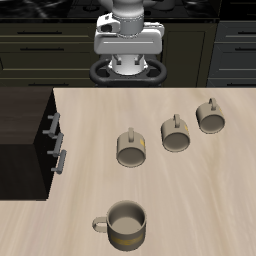

In [6]:
with open(bddl_file_names[0], "r") as f:
    print(f.read())

from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

import torch
import torchvision


env_args = {
    "bddl_file_name": bddl_file_names[0],
    "camera_heights": 256,
    "camera_widths": 256
}

env = OffScreenRenderEnv(**env_args)
obs = env.reset()
display(Image.fromarray(obs["agentview_image"][::-1]))

### Define the scene3

In [4]:
object_dir = get_object_dict()

for x in object_dir.keys():
    if 'mug' in x:
        print(x)

for x in object_dir.keys():
    if 'alphabet' in x:
        print(x)

red_coffee_mug
porcelain_mug
white_yellow_mug
libero_mug
libero_mug_yellow
libero_mug_yellow_x
libero_mug_yellow_y
libero_mug_yellow_z
alphabet_soup


In [5]:
import re
from libero.libero.envs import objects
from libero.libero.utils.bddl_generation_utils import *
from libero.libero.envs.objects import OBJECTS_DICT
from libero.libero.utils.object_utils import get_affordance_regions

from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates

@register_mu(scene_type="kitchen")
class KitchenDemoScene2(InitialSceneTemplates):
    def __init__(self):

        fixture_num_info = {
            "kitchen_table": 1,
            "wooden_cabinet": 1,
        }

        object_num_info = {
            "libero_mug_yellow": 1,
            "alphabet_soup": 3,
        }

        super().__init__(
            workspace_name="kitchen_table",
            fixture_num_info=fixture_num_info,
            object_num_info=object_num_info,
        )

    def define_regions(self):
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.0, -0.30],
                region_name="wooden_cabinet_init_region",
                target_name=self.workspace_name,
                region_half_len=0.01,
                yaw_rotation=(np.pi, np.pi),
            )
        )

        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.25, 0.0],
                region_name="libero_mug_yellow_init_region",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )
        
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.0, 0.0],
                region_name="alphabet_soup_init_region_x",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )

        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[-0.1, 0.15],
                region_name="alphabet_soup_init_region_y",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )
        
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[-0.2, 0.3],
                region_name="alphabet_soup_init_region_z",
                target_name=self.workspace_name,
                region_half_len=0.025,
            )
        )
        
        self.xy_region_kwargs_list = get_xy_region_kwargs_list_from_regions_info(
            self.regions
        )

    @property
    def init_states(self):
        states = [
            ("On", "libero_mug_yellow_1", "kitchen_table_libero_mug_yellow_init_region"),
            ("On", "alphabet_soup_1", "kitchen_table_alphabet_soup_init_region_x"),
            ("On", "alphabet_soup_2", "kitchen_table_alphabet_soup_init_region_y"),
            ("On", "alphabet_soup_3", "kitchen_table_alphabet_soup_init_region_z"),
            ("On", "wooden_cabinet_1", "kitchen_table_wooden_cabinet_init_region"),
        ]
        return states



In [6]:
scene_name = "kitchen_demo_scene2"
language = "libero demo behaviors"
register_task_info(language,
                   scene_name=scene_name,
                   objects_of_interest=[],
                   goal_states=[
                       ("Open", "wooden_cabinet_1_top_region"),
                       ("In", "libero_mug_yellow_1", "wooden_cabinet_1_top_region"),
                       ],
)




YOUR_BDDL_FILE_PATH = "./custom_pddl"
bddl_file_names, failures = generate_bddl_from_task_info(folder=YOUR_BDDL_FILE_PATH)
print(bddl_file_names)
print("Encountered some failures: ", failures)

> /mnt/hdd3/xingyouguang/projects/robotics/openvla-mini/LIBERO/libero/libero/utils/task_generation_utils.py(69)generate_bddl_from_task_info()
     68             import ipdb; ipdb.set_trace()
---> 69             try:
     70                 result = get_suite_generator_func(scene.workspace_name)(



'kitchen_demo_scene2'
     64             language = task_info_tuple.language
     65             objects_of_interest = task_info_tuple.objects_of_interest
     66             goal_states = task_info_tuple.goal_states
     67             scene = get_scene_class(scene_name)()
     68             import ipdb; ipdb.set_trace()
---> 69             try:
     70                 result = get_suite_generator_func(scene.workspace_name)(
     71                     language=language,
     72                     xy_region_kwargs_list=scene.xy_region_kwargs_list,
     73                     affordance_region_kwargs_list=scene.affordance_region_kwargs_list,
     74                     fixture_object_dict=scene.fixture_object_dict,

     54 def generate_bddl_from_task_info(folder="/tmp/pddl"):
     55     results = []
     56     failures = []
     57     bddl_file_names = []
     58     os.makedirs(folder, exist_ok=True)
     59 
     60     registered_task_info_dict = get_task_info()
     61     f

(define (problem LIBERO_Kitchen_Tabletop_Manipulation)
  (:domain robosuite)
  (:language libero demo behaviors)
    (:regions
      (wooden_cabinet_init_region
          (:target kitchen_table)
          (:ranges (
              (-0.01 -0.31 0.01 -0.29)
            )
          )
          (:yaw_rotation (
              (3.141592653589793 3.141592653589793)
            )
          )
      )
      (libero_mug_yellow_init_region
          (:target kitchen_table)
          (:ranges (
              (0.225 -0.025 0.275 0.025)
            )
          )
          (:yaw_rotation (
              (0.0 0.0)
            )
          )
      )
      (alphabet_soup_init_region_x
          (:target kitchen_table)
          (:ranges (
              (-0.025 -0.025 0.025 0.025)
            )
          )
          (:yaw_rotation (
              (0.0 0.0)
            )
          )
      )
      (alphabet_soup_init_region_y
          (:target kitchen_table)
          (:ranges (
              (-0.125 0.125 -

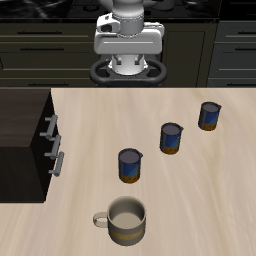

In [8]:
with open(bddl_file_names[0], "r") as f:
    print(f.read())

from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

import torch
import torchvision


env_args = {
    "bddl_file_name": bddl_file_names[0],
    "camera_heights": 256,
    "camera_widths": 256
}

env = OffScreenRenderEnv(**env_args)
obs = env.reset()
display(Image.fromarray(obs["agentview_image"][::-1]))

In [10]:
print(env.__class__)
print(env.env.__class__)

<class 'libero.libero.envs.env_wrapper.OffScreenRenderEnv'>
<class 'libero.libero.envs.problems.libero_kitchen_tabletop_manipulation.Libero_Kitchen_Tabletop_Manipulation'>


In [12]:
from libero.libero.envs.bddl_base_domain import TASK_MAPPING
for x in TASK_MAPPING:
    print(x)

libero_tabletop_manipulation
libero_coffee_table_manipulation
libero_floor_manipulation
libero_study_tabletop_manipulation
libero_living_room_tabletop_manipulation
libero_kitchen_tabletop_manipulation


### The end